In [3]:
import pandas as pd

home_data = pd.read_csv('C:/Users/Vandhana/Documents/iim skills/python/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


C:\Users\Vandhana\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<Axes: xlabel='longitude', ylabel='latitude'>

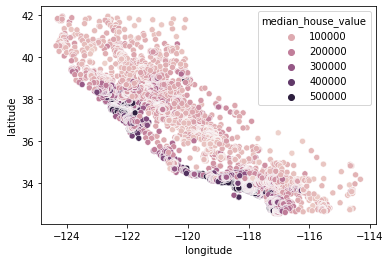

In [4]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)



In [7]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [8]:
X_train_norm

array([[ 0.26937372, -0.96303572],
       [ 0.2762676 , -0.96108075],
       [ 0.27623513, -0.96109009],
       ...,
       [ 0.28741997, -0.95780466],
       [ 0.27416102, -0.9616838 ],
       [ 0.27304949, -0.96199999]])

In [12]:
#from sklearn import KMeans
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=n_clusters, init='kmeans++')

kmeans = KMeans(n_clusters = 3, random_state = 0, init='k-means++')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

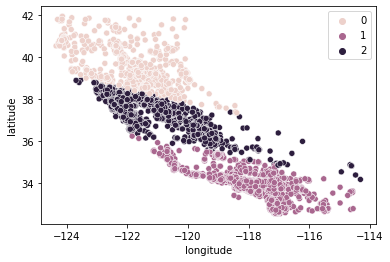

In [13]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)



<Axes: ylabel='median_house_value'>

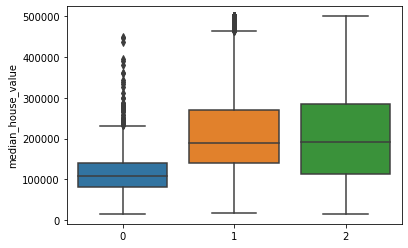

In [14]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [15]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499956340585485